In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pr_ner = pickle.load(open("ft_pr_ner.pkl", "rb"))
tuned_ner = pickle.load(open("ft_ft_ner.pkl", "rb"))
bert_ner = pickle.load(open("bert_ft_ner.pkl", "rb"))

In [17]:
np_mtrx = np.empty((len(pr_ner), 3))
np_mtrx[:, 0] = list(pr_ner.values())
np_mtrx[:, 1] = list(tuned_ner.values())
np_mtrx[:, 2] = list(bert_ner.values())


df = pd.DataFrame(data=np_mtrx, columns=["ft_pretrained", "ft_finetuned", "bert_finetuned"], index=list(pr_ner.keys()))

In [18]:
df.drop("ремонт", inplace=True)

<Axes: ylabel='Count'>

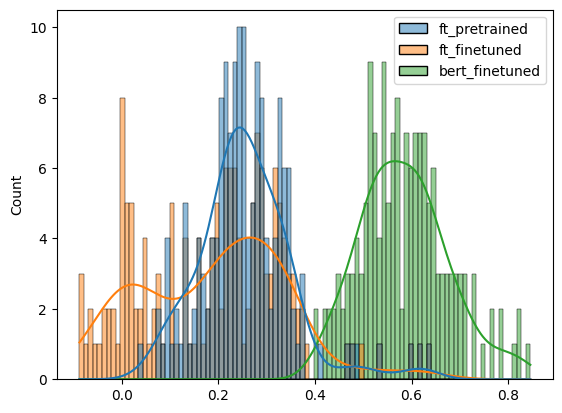

In [20]:
sns.histplot(df, bins=100, kde=True)

In [31]:
df.median(axis=0)

,0
ft_pretrained,0.248353
ft_finetuned,0.214993
bert_finetuned,0.576841


In [44]:
comparison = pickle.load(open("df.pkl", "rb"))

In [46]:
thresholds = {
    'FT_tuned': (0.248353, 'green', 'red'),
    'FT_base': (0.214993, 'green', 'red'),
    'BERT': (0.576841, 'green', 'red'),
    'Label': (0, 'green', 'red')
}

def color_columns(s):
    col_name = s.name
    threshold, color_above, color_below = thresholds[col_name]
    return ['background-color: {}'.format(color_above if v > threshold else color_below) for v in s]

# Apply the function to the entire DataFrame
styled_df = comparison.style.apply(color_columns, subset=comparison.columns)

# To display the styled DataFrame, use `styled_df` in a Jupyter notebook
styled_df

,FT_tuned,FT_base,BERT,Label
кирпичной кладки,0.231862,0.220176,0.656701,1
стеновых панелей,0.255455,0.262024,0.486960,1
теплых полов,0.250968,0.261131,0.417442,1
посудомоечной машины,0.266289,0.271767,0.592285,1
стиральной машины,0.318247,0.319966,0.623303,1
входной двери,0.301089,0.301096,0.520282,1
рекламных конструкций,0.242219,0.258109,0.501708,1
навесных потолков,0.297383,0.299795,0.524958,1
натяжных потолков,0.288994,0.297719,0.489574,1
вентиляционных каналов,0.209594,0.230276,0.502209,1
